In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [2]:
class SimpleLinearRegression:
    '''
    A class which implements simple linear regression model.
    '''
    def __init__(self):
        self.b0 = None
        self.b1 = None
    
    def fit(self, X, y):
        '''
        Used to calculate slope and intercept coefficients.
        
        :param X: array, single feature
        :param y: array, true values
        :return: None
        '''
        numerator = np.sum((X - np.mean(X)) * (y - np.mean(y)))
        denominator = np.sum((X - np.mean(X)) ** 2)
        self.b1 = numerator / denominator
        self.b0 = np.mean(y) - self.b1 * np.mean(X)
        
    def predict(self, X):
        '''
        Makes predictions using the simple line equation.
        
        :param X: array, single feature
        :return: None
        '''
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X, y)` before making predictions.')
        return self.b0 + self.b1 * X

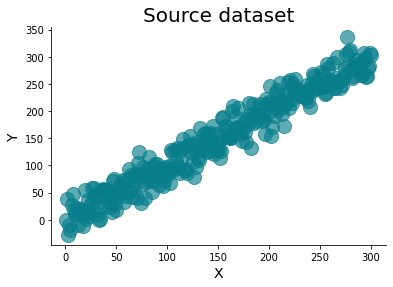

In [3]:
X = np.arange(start=1, stop=301)
y = np.random.normal(loc=X, scale=20)

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65)
plt.title('Source dataset', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = SimpleLinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [6]:
model.b0, model.b1

(-0.5035301430044967, 1.0020625086408796)

In [7]:
preds

array([203.91722162, 267.04715966, 152.81203368,   9.51709494,
       233.97909688, 226.96465932, 196.90278406, 109.72334581,
         5.50884491, 175.85947138, 237.98734691,  57.61609536,
       218.94815925,  45.59134525, 182.87390894, 221.95434678,
       290.09459736, 211.93372169, 148.80378364, 165.83884629,
        78.65940804, 113.73159584, 250.01209702, 251.01415953,
       104.71303326,  42.58515773, 282.07809729, 296.10697241,
       157.82234622, 238.98940942,  17.53359501, 164.83678378,
        33.56659515,  24.54803257, 215.94197172, 119.74397089,
         7.51296993,  90.68415814,  46.59340776,  73.6490955 ,
        93.69034567,  76.65528302, 287.08840984,  60.62228288,
        77.65734553,  63.62847041, 234.98115939, 229.97084684,
       111.72747082, 231.97497186, 180.86978392, 144.79553361,
       239.99147193,  75.65322051, 298.11109743, 279.07190977,
        97.6985957 ,  92.68828316, 192.89453402,  25.55009508])

In [8]:
y_test

array([213.76776156, 298.77570551, 126.36524459,   7.98620966,
       226.33479268, 232.54328391, 222.15499576, 131.1226913 ,
        27.3701642 , 160.53349105, 218.18301528,  32.57504666,
       253.93504265,  14.48284587, 194.65537682, 219.63843114,
       266.0772978 , 218.38093237, 128.61400859, 167.79428777,
        68.88014188, 107.99302147, 246.40353249, 272.51947779,
       124.93275638,  31.93197902, 260.16337486, 264.06065922,
       163.19888018, 240.22534082,  15.4625127 , 208.77391926,
         1.23923477,  28.46816871, 227.11875508, 137.51901433,
        18.22091646,  81.00165468,  70.7806713 ,  31.42318302,
        87.68241381,  82.74283965, 281.22653264,  75.1143903 ,
        40.06435362,  81.77892028, 229.0230505 , 227.21811619,
       123.79391174, 236.44332151, 194.31467331, 171.97317057,
       207.33925693,  96.15930877, 282.15396513, 309.02885795,
        93.22561979,  93.72034625, 181.29267529,  59.02970068])

In [9]:
from sklearn.metrics import mean_squared_error

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
rmse(y_test, preds)

19.94520070216051

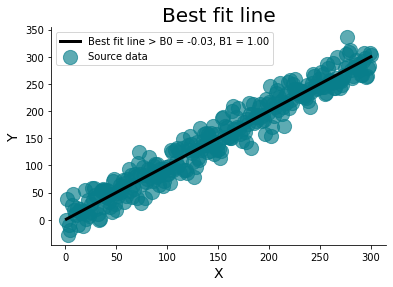

In [10]:
model_all = SimpleLinearRegression()
model_all.fit(X, y)
preds_all = model_all.predict(X)

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(np.array(X_train).reshape(-1, 1), y_train)
sk_preds = sk_model.predict(np.array(X_test).reshape(-1, 1))

sk_model.intercept_, sk_model.coef_

(-0.5035301430044683, array([1.00206251]))

In [13]:
rmse(y_test, sk_preds)

19.94520070216051